In [7]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:

from sklearn import preprocessing
iris_data= pd.read_csv("C:/Users/ambar/All/OnlyCodes/datasets/Iris.csv")
# iris_data.head()
label_encoder=preprocessing.LabelEncoder()
iris_data['Species']=label_encoder.fit_transform(iris_data['Species'])
# print(iris_data.describe())
np_iris=iris_data.to_numpy()
x_data=np_iris[:,1:5]
y_data=np_iris[:,5]
# print(np_iris[:5])
# print(x_data[:5])
# print(y_data[:5])
scaler=StandardScaler().fit(x_data)
x_data=scaler.transform(x_data)
print(x_data[:5])
y_data=tf.keras.utils.to_categorical(y_data,3)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.10)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]
(135, 4) (15, 4) (135, 3) (15, 3)


In [9]:
from tensorflow import keras
no_class=3
model=tf.keras.models.Sequential()
model.add(keras.layers.Dense(128,input_shape=(4,),name='HL1',activation='relu')) # 128 nodes input shape 4 row as transpose
model.add(keras.layers.Dense(128,name='HL2',activation='relu'))
model.add(keras.layers.Dense(no_class,name='OL',activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL1 (Dense)                 (None, 128)               640       
                                                                 
 HL2 (Dense)                 (None, 128)               16512     
                                                                 
 OL (Dense)                  (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 0s 21ms/step - loss: 0.8938 - accuracy: 0.6852 - val_loss: 0.6208 - val_accuracy: 0.8148
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 0.5909 - accuracy: 0.7870 - val_loss: 0.4621 - val_accuracy: 0.9259
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4806 - accuracy: 0.8056 - val_loss: 0.3862 - val_accuracy: 0.9259
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4163 - accuracy: 0.8241 - val_loss: 0.3286 - val_accuracy: 0.9259
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3793 - accuracy: 0.8241 - val_loss: 0.2925 - val_accuracy: 0.9630
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3441 - accuracy: 0.8333 - val_loss: 0.2627 - val_accuracy: 0.9630
Epoch 7/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3152 - accuracy: 0.8426 - val_loss: 0.2321 - val_accuracy: 1.0000
Epoch 8/10
7/7 [=================

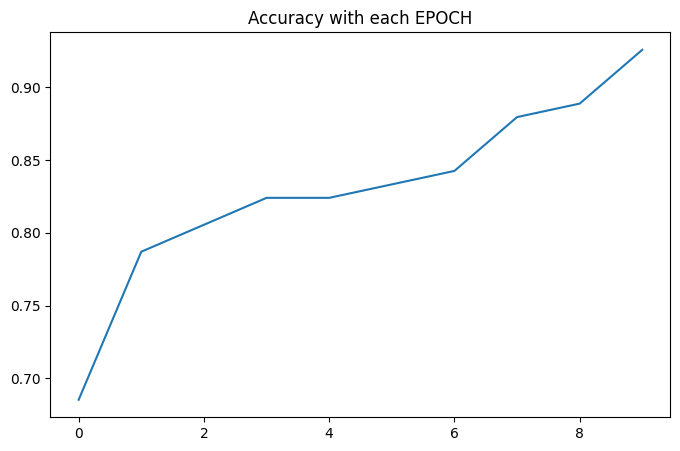

1/1 [==============================] - 0s 24ms/step - loss: 0.1461 - accuracy: 0.9333


[0.14606024324893951, 0.9333333373069763]

In [10]:
import matplotlib.pyplot as plt

VERBOSE=1
BATCH_SIZE=16
EPOCHS=10
VALIDATION_SPLIT=0.2
history= model.fit(x_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title("Accuracy with each EPOCH")
plt.show()
model.evaluate(x_test,y_test)


In [11]:
model.save("iris_save")
loaded_model=keras.models.load_model("iris_save")
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL1 (Dense)                 (None, 128)               640       
                                                                 
 HL2 (Dense)                 (None, 128)               16512     
                                                                 
 OL (Dense)                  (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
predic_input=[[6.2,3.0,1.2,1.6]]
scaled_input=scaler.transform(predic_input)
raw_predic=loaded_model.predict(scaled_input)
prediction=np.argmax(raw_predic) # returns index of highest probable
print("List of probablities",raw_predic)
print(label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 40ms/step
List of probablities [[0.44570053 0.40276012 0.15153939]]
['Iris-setosa']
